In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
os.environ["CUDA_VISIBLE_DEVICES"]=" "

# load model

In [2]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_7/models/MultiTask_EffNetB5_15AB_5FP_fold7_1.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

# Select Data

In [3]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Validationdf_fold7.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(657, 25)
(657, 25)
Normal:  (429, 25)
Abnormal:  (228, 25)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,...,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,FileName,filename
0,0,0,411,411,49,P5,P52,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,200.0,119.0,561.0,667.0,0.202166,0.132937,0.564982,0.743028,AB01 P5-2 C049.JPG,AB01 P5-2 C049.JPG
1,1,1,412,412,49,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,191.0,125.0,453.0,472.0,0.189902,0.139520,0.450450,0.525253,AB02 P2 C049.JPG,AB02 P2 C049.JPG
2,2,2,413,413,49,P5,P51,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,162.0,163.0,546.0,638.0,0.157665,0.181944,0.530864,0.709091,AB02 P5-1 C049.JPG,AB02 P5-1 C049.JPG
3,3,3,414,414,49,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,271.0,118.0,530.0,603.0,0.275638,0.131439,0.538745,0.670707,AB02 P1 C049.JPG,AB02 P1 C049.JPG
4,4,4,415,415,49,P3,P31,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,149.0,152.0,577.0,718.0,0.164463,0.169823,0.634730,0.797980,AB02 P3-1 C049.JPG,AB02 P3-1 C049.JPG


In [4]:
labels = {0: 'FP-A', 1: 'FP-B', 2: 'FP-C', 3: 'FP-D', 4: 'FP-E'}
print(labels)

{0: 'FP-A', 1: 'FP-B', 2: 'FP-C', 3: 'FP-D', 4: 'FP-E'}


# Prediction

In [5]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[1][0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])
    
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

# Performance

In [6]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Views'])
print('Actual : ',len(classe))
print(classe)

Predicted :  5
{'FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E'}
Actual :  5
{'FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E'}


In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Views'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 81.7351598173516%
              precision    recall  f1-score   support

        FP-A       0.86      0.71      0.77       129
        FP-B       0.76      0.91      0.83       199
        FP-C       0.87      0.82      0.85       197
        FP-D       0.81      0.78      0.80        97
        FP-E       0.84      0.74      0.79        35

    accuracy                           0.82       657
   macro avg       0.83      0.79      0.81       657
weighted avg       0.82      0.82      0.82       657



Text(0.5, 21.5, 'Predicted label')

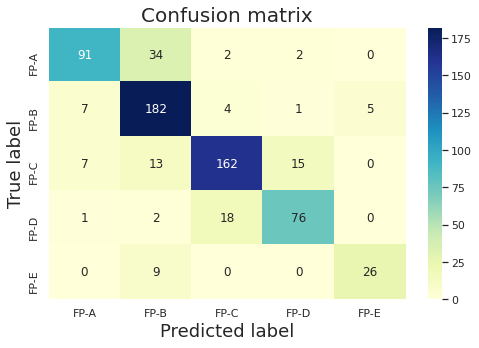

In [8]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)